In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pyqg

year = 24*60*60*360.
# Set up a model which will run for 20 years and start averaging after 10 years.
# There are lots of parameters that can be specified as keyword arguments
# but we are just using the defaults.
m = pyqg.QGModel(tmax=20*year, twrite=10000, tavestart=10*year)
# run it
m.run()

t=        72000000, tc=     10000: cfl=0.091991, ke=0.000470168
t=       144000000, tc=     20000: cfl=0.108320, ke=0.000510048
t=       216000000, tc=     30000: cfl=0.092152, ke=0.000502698
t=       288000000, tc=     40000: cfl=0.094201, ke=0.000521347
t=       360000000, tc=     50000: cfl=0.114285, ke=0.000487426
t=       432000000, tc=     60000: cfl=0.093145, ke=0.000510911
t=       504000000, tc=     70000: cfl=0.090658, ke=0.000495496
t=       576000000, tc=     80000: cfl=0.095196, ke=0.000461181


## Example of plots

## The QG potential vorticities in physical space

In [3]:
q1 = m.q[0] + m.Qy[0]*m.y
q2 = m.q[1] + m.Qy[1]*m.y

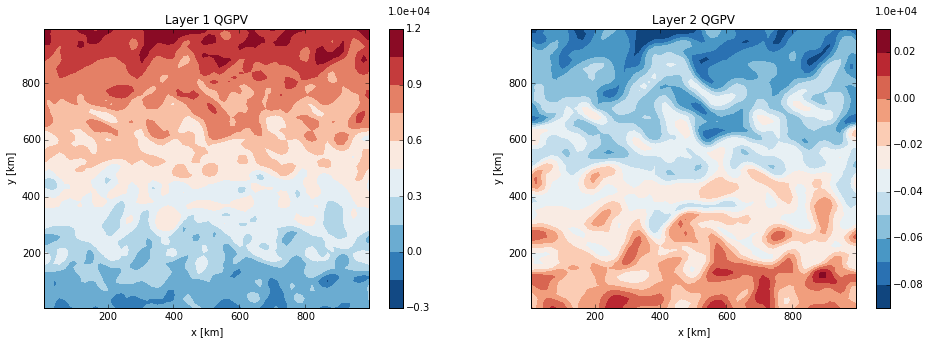

In [6]:
X, Y = m.x/1e3, m.y/1e3 # give units in km
pv_factor = 1.e4
factor_s = str('%1.1e') %pv_factor

fig = plt.figure(figsize=(16.,5.))
ax1 = fig.add_subplot(121)
cf1 = ax1.contourf(X, Y, pv_factor*q1, 12, cmap='RdBu_r')
cb1 = fig.colorbar(cf1)
cb1.ax.text(.0,1.05,factor_s,rotation=0)
ax1.set_xlabel('x [km]')
ax1.set_ylabel('y [km]')
ax1.set_title('Layer 1 QGPV')
ax2 = fig.add_subplot(122)
cf2 = ax2.contourf(X, Y, pv_factor*q2, 12, cmap='RdBu_r')
cb2 = fig.colorbar(cf2)
ax2.set_title('Layer 2 QGPV')
cb2.ax.text(.0,1.05,factor_s,rotation=0)
ax2.set_xlabel('x [km]')
ax2.set_ylabel('y [km]')

## KE spectra and Energy budget

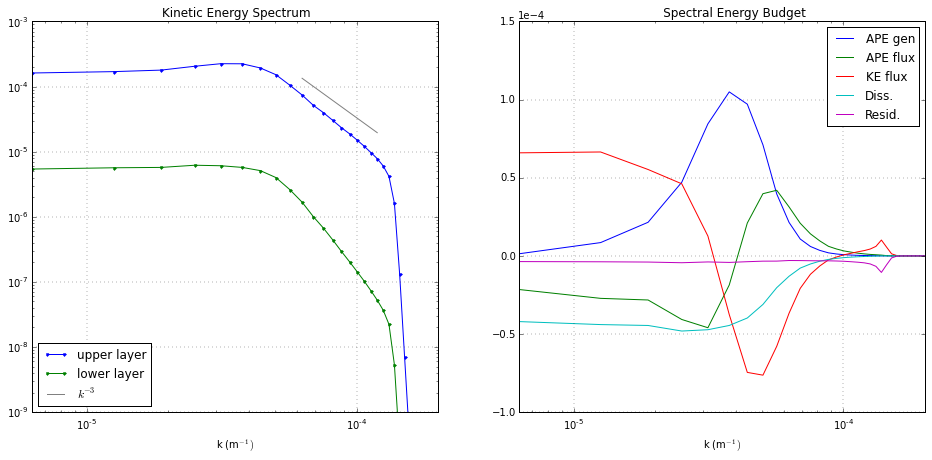

In [7]:
# some spectral plots
KE1spec = m.get_diagnostic('KEspec')[0].sum(axis=0)   # note that this is misleading for anisotrphic flows...
KE2spec = m.get_diagnostic('KEspec')[1].sum(axis=0)   #  we should sum azimuthaly, and plot as a functions of kappa 
                                                
# factor ebud
ebud_factor = 1.e4
ebud_factor_s= str('%1.1e') %ebud_factor

# inertial range
ir = np.r_[10:20]


fig = plt.figure(figsize=(16.,7.))
ax1 = fig.add_subplot(121)
ax1.loglog( m.kk, KE1spec, '.-' )
ax1.loglog( m.kk, KE2spec, '.-' )
ax1.loglog( m.kk[10:20], 2*(m.kk[ir]**-3) *
                         KE1spec[ir].mean() / (m.kk[ir]**-3).mean(),
                         '0.5')
ax1.set_ylim([1e-9,1e-3])
ax1.set_xlim([m.kk.min(), m.kk.max()])
ax1.grid()
ax1.legend(['upper layer','lower layer', r'$k^{-3}$'],
       loc='lower left')
ax1.set_xlabel(r'k (m$^{-1})$')
ax1.set_title('Kinetic Energy Spectrum')

# the spectral energy budget
ebud = [ -m.get_diagnostic('APEgenspec').sum(axis=0),
         -m.get_diagnostic('APEflux').sum(axis=0),
         -m.get_diagnostic('KEflux').sum(axis=0),
         -m.rek*m.del2*m.get_diagnostic('KEspec')[1].sum(axis=0)*m.M**2 ]
ebud.append(-np.vstack(ebud).sum(axis=0))
ebud_labels = ['APE gen','APE flux','KE flux','Diss.','Resid.']

ax2 = fig.add_subplot(122)
[ax2.semilogx(m.kk, term) for term in ebud]
ax2.legend(ebud_labels, loc='upper right')

ax2.grid()
ax2.set_xlim([m.kk.min(), m.kk.max()])
ax1.set_xlabel(r'k (m$^{-1})$')
ax2.ticklabel_format(axis='y',style = 'sci', scilimits=(-2,2))
ax2.set_title(r'      Spectral Energy Budget')

ax2.set_xlabel(r'k (m$^{-1})$')